In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [9]:
# Gerador de posições
up = 1000 #Quantidade de cargas positivas
hp = 9.5 # Posição em x das cargas positivas
upp = [[], []] #para calculo do campo
upp1 = [[], []]# para ser plotado
yp = [] #Guarda a carga positiva

for i in range(up):
    b = -40
    a = 100/up
    upp[0].append(hp)
    upp[1].append(b+i*a)
    yp.append(1)
    if b+i*a >=0 and b+i*a <=14:
        upp1[0].append(hp)
        upp1[1].append(b+i*a)

un = 1000 #Quantidade de cargas negativas
hn = 16.5 # Posição em x das cargas negativas
unn = [[], []] #para calculo do campo
unn1 = [[], []] # para ser plotado
yn = [] #Guarda a carga negativa

for i in range(up):
    a = 100/un
    unn[0].append(hn)
    unn[1].append(-40+i*a) 
    yn.append(-1)
    #yn.append(1)
    if -40+i*a >=0 and -40+i*a <=14:
        unn1[0].append(hn)
        unn1[1].append(-40+i*a)

<ipython-input-16-fcf840fac3f8>:84: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(*qqn, 'bo',color = 'blue')
<ipython-input-16-fcf840fac3f8>:85: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(*qqp, 'bo',color = 'red')


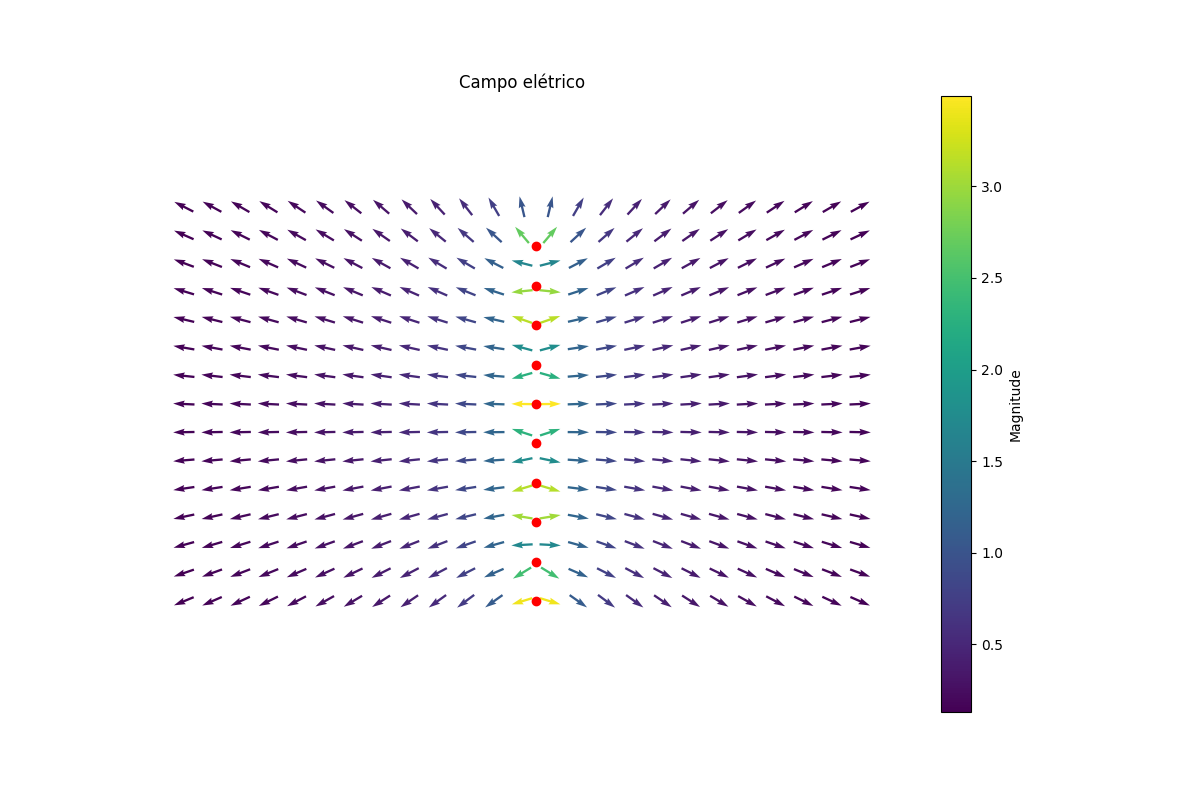

In [16]:
#definindo a grade
N = 15
M = 25
#Coordenadas
X = np.arange(0, M, 1)
Y = np.arange(0, N, 1)
X, Y = np.meshgrid(X, Y)
#Encontrando os campos
Ex = np.zeros((N, M))
Ey = np.zeros((N, M))
# Quantidade de cargas
nq = 3
aleatoriedade = 0  #0 para cargas em locais selecionados e 1 para cargas em locais aleatórios
lin = 1.3 #De certa forma a linearidade do campo, quando 1 o campo é 1/x, quando 2 é 1/x^2 e etc


#Debugging

#print(Ex)
#print(Ey)


# Computando para cargas aleatóriamente posicionadas no espaço
qq = [[], []]  # guarda as coordenadas das cargas
if aleatoriedade == 1:
    for dummy in range(nq): 
        q = random.choice([-1, 1])
        qy, qx = random.randrange(1, N), random.randrange(1, M)
        # print(q, qx, qy)
        qq[0].append(qx)
        qq[1].append(qy)
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qy) ** 2 + (j - qx) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += q * (j - qx) / denom
                    Ey[i, j] += q * (i - qy) / denom

# Computando para cargas posicionadas em um local selecionado                
else:
    #Definindo posição e intensidade das cargas
    qqp = [[12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5], [0,1.4,2.8,4.2,5.6,7,8.4,9.8,11.2,12.6]] # guarda as posições das cargas negativas () formato:([X1,X2....], [Y1,Y2.....])
    qqn = [[], []] # guarda as posições das cargas positivas
    qn = [] # guarda a magnitude das cargas negativas
    qp = [1,1,1,1,1,1,1,1,1,1] # guarda a magnitude das cargas positivas
    #Para as barras:
    #qqp = upp # guarda as posições das cargas negativas () formato:([X1,X2....], [Y1,Y2.....])
    #qqn = unn # guarda as posições das cargas positivas
    #qn = yn # guarda a magnitude das cargas negativas
    #qp = yp # guarda a magnitude das cargas positivas
    
    #Loop nas cargas negativas:
    for k in range(len(qn)):
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qqn[1][k]) ** 2 + (j - qqn[0][k]) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += qn[k] * (j - qqn[0][k]) / denom
                    Ey[i, j] += qn[k] * (i - qqn[1][k]) / denom
    #Loop nas cargas positivas:
    for k in range(len(qp)):
        for i in range(N):#N está associado a Y
            for j in range(M):#M está associado a X
                denom = ((i - qqp[1][k]) ** 2 + (j - qqp[0][k]) ** 2) ** lin
                if denom != 0: 
                    Ex[i, j] += qp[k] * (j - qqp[0][k]) / denom
                    Ey[i, j] += qp[k] * (i - qqp[1][k]) / denom
                        
# Cor dos vetores
C = np.hypot(Ex, Ey)
# normalizando o tamanho dos vetores
E = (Ex ** 2 + Ey ** 2) ** .5
#print(Ex)
Ex = Ex / E
Ey = Ey / E

# Desenhando
plt.figure(figsize=(12, 8))
# Cargas
if aleatoriedade == 1:
    plt.plot(*qq, 'bo')
else:
    #Para cargas
    plt.plot(*qqn, 'bo',color = 'blue')
    plt.plot(*qqp, 'bo',color = 'red')
    #Para as barras sinais diferentes
    #plt.plot(*unn1, 'bo',color = 'blue')
    #plt.plot(*upp1, 'bo',color = 'red')
    #Para as duas barras positivas
    #plt.plot(*unn1, 'bo',color = 'red')
    #plt.plot(*upp1, 'bo',color = 'red')
    
# Campo
plt.quiver(X, Y, Ex, Ey, C, pivot='mid')
# Legenda de magnitude
cbar = plt.colorbar()
cbar.ax.set_ylabel('Magnitude')
# misc
plt.title('Campo elétrico')
plt.ylim(14)
plt.xlim(20)
plt.axis('equal')
plt.axis('off')
plt.show()

In [ ]:
### EXEMPLOS PARA UTILIZAÇÃO

# 1 carga positiva
    qqn = [[], []] # guarda as posições das cargas negativas
    qqp = [[12.5], [6.5]] # guarda as posições das cargas positivas
    qn = [] # guarda a magnitude das cargas negativas
    qp = [1] # guarda a magnitude das cargas positivas


# 2 cargas com sinais diferentes distantes
    qqn = [[16.5], [6.5]] # guarda as posições das cargas negativas
    qqp = [[8.5], [6.5]] # guarda as posições das cargas positivas
    qn = [-1] # guarda a magnitude das cargas negativas
    qp = [1] # guarda a magnitude das cargas positivas
    
# 2 cargas negativas
    qqn = [[16,8], [6,6]] # guarda as posições das cargas negativas
    qqp = [[], []] # guarda as posições das cargas positivas
    qn = [-1,-1] # guarda a magnitude das cargas negativas
    qp = [] # guarda a magnitude das cargas positivas
    
# 2 cargas positivas
    qqp = [[16,8], [6,6]] # guarda as posições das cargas negativas
    qqn = [[], []] # guarda as posições das cargas positivas
    qn = [] # guarda a magnitude das cargas negativas
    qp = [1,1] # guarda a magnitude das cargas positivas
    
# 10 cargas positivas verticalmente alinhadas
    qqp = [[12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5,12.5], [0,1.4,2.8,4.2,5.6,7,8.4,9.8,11.2,12.6]] # guarda as posições das cargas negativas () formato:([X1,X2....], [Y1,Y2.....])
    qqn = [[], []] # guarda as posições das cargas positivas
    qn = [] # guarda a magnitude das cargas negativas
    qp = [1,1,1,1,1,1,1,1,1,1] # guarda a magnitude das cargas positivas
